## <u>Car Price Prediction Using LinearRegression</u>

### Using LinearRegression model, we are going to predict the price of the new car by using different dependent parameters which enhance for the car manufacturing.

### Importing Libararies

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [109]:
### Considering df as a Variable

In [110]:
df = pd.read_csv('AutoData (1).csv')

In [111]:
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [112]:
df.shape

(205, 25)

In [113]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Performing EDA

In [114]:
df.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

##### There  is no null values present in the data

In [115]:
df.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [116]:
### Renaming 'make' to Company_Name

df.rename(columns = {'make': 'Company_Name'}, inplace = True)

In [117]:
df.Company_Name.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

### Data Cleaning and Preparation

In [118]:
### Splitting company from Car_Name column

Car_Name = df['Company_Name'].apply(lambda x : x.split(' ')[0])
df.insert(3,"Car_Name",Car_Name)
df.drop(['Company_Name'],axis=1,inplace=True)
df.head()

,symboling,fueltype,Car_Name,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [119]:
df.Car_Name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [120]:
### Spelling error

df.Car_Name = df.Car_Name.str.lower()

### Using replace function for the spell mistake

def replace_name(a,b):
    df.Car_Name.replace(a,b,inplace=True)

replace_name('porcshce','porsche')
replace_name('maxda','mazda')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')
replace_name('toyouta','toyota')

df.Car_Name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [121]:
#Checking for duplicates

df.loc[df.duplicated()]

,symboling,fueltype,Car_Name,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


### Now all the values are unique

Text(0.5, 1.0, 'Car Price')

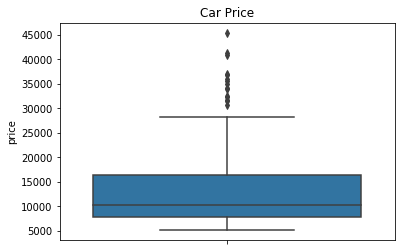

In [122]:
sns.boxplot(y = 'price', data = df)
plt.title('Car Price')

#### The most prices in the dataset are low(Below 15,000).

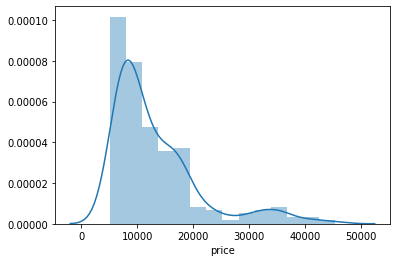

In [123]:
sns.distplot(df.price)


#### Price is right hand Skewed

In [124]:
df.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.95,1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
95%      32472.400000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

#### Price Conclusion

#### The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400).

### Data Visualization

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  # Remove the CWD from sys.path while we load stuff.


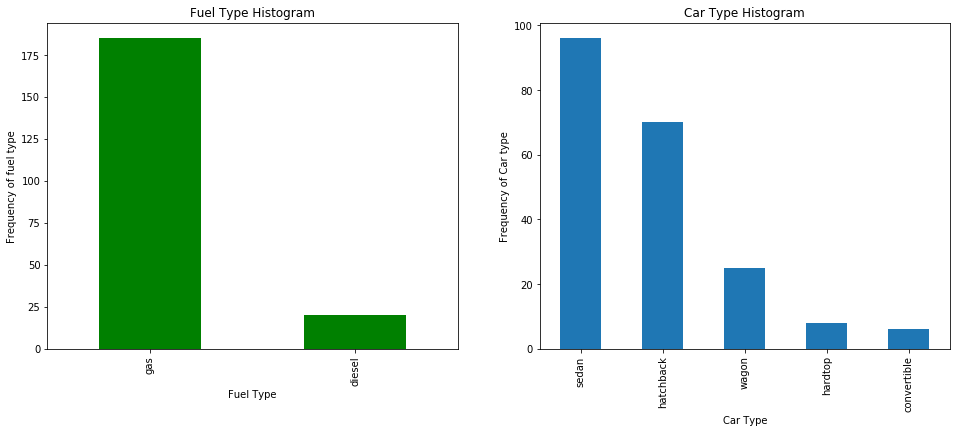

In [125]:
plt.figure(figsize=(25, 6))


plt.subplot(1,3,1)
plt1 = df.fueltype.value_counts().plot('bar', color = 'g')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,2)
plt1 = df.carbody.value_counts().plot('bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

#### 1.Fuel like gas is more preferred than the diesel.

#### 2.sedan is the top car type prefered.

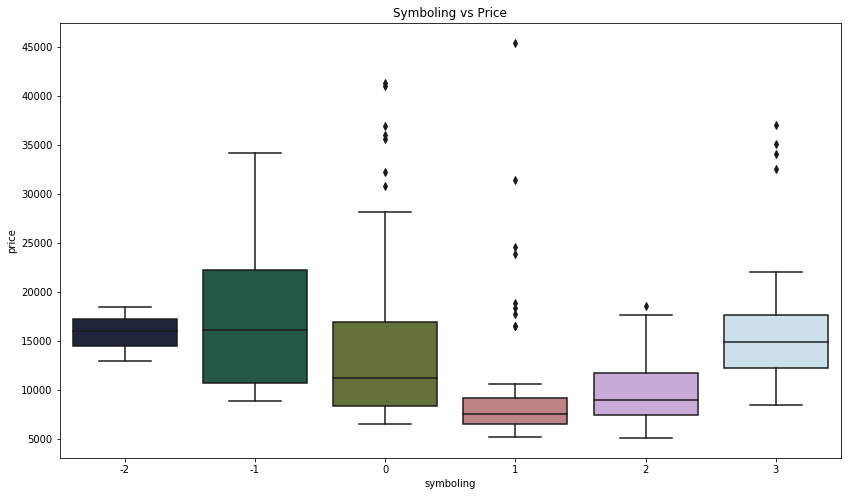

In [126]:
plt.figure(figsize=(14,8))

plt.title('Symboling vs Price')
sns.boxplot(x=df.symboling, y=df.price, palette=("cubehelix"))

plt.show()

#### 1.It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)

#### 2.The cars with -1 symboling seems to be high priced 

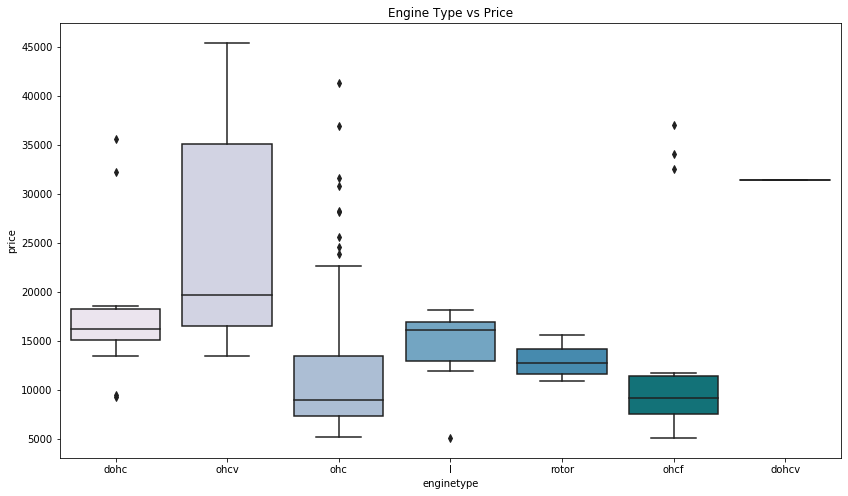

In [127]:
plt.figure(figsize=(14,8))

plt.title('Engine Type vs Price')
sns.boxplot(x=df.enginetype, y=df.price, palette=("PuBuGn"))

plt.show()

#### 1. ohc engine is <u>more preferred</u>

#### 2. ohcv has the <u>high price range</u>

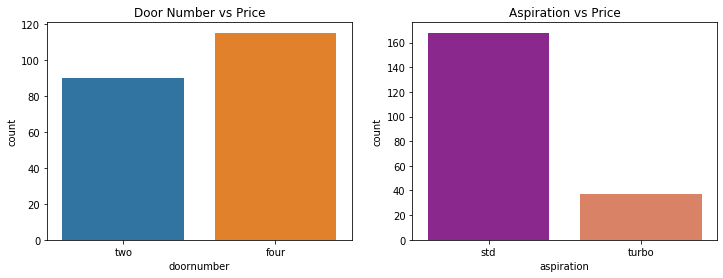

In [128]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Door Number vs Price')
sns.countplot(df.doornumber)

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.countplot(df.aspiration, palette=("plasma"))

plt.show()



#### 1.Doornumber variable is not affacting the price much. There is <u>NO</u> significant difference between them.

#### 2.It seems aspiration with std have <u>higher price range than the turbo</u>

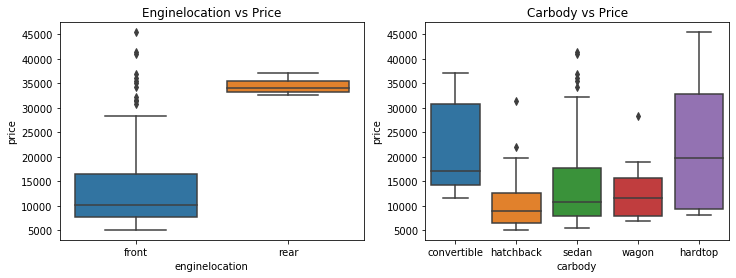

In [129]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Enginelocation vs Price')
sns.boxplot(x = 'enginelocation', y = 'price', data = df)


plt.subplot(1,2,2)
plt.title('Carbody vs Price')
sns.boxplot(x = 'carbody', y = 'price', data = df)

#### 1.There is not much significant difference in engine location

#### 2.Hardtop carbody has variant with the highest price and hatchback has the low price

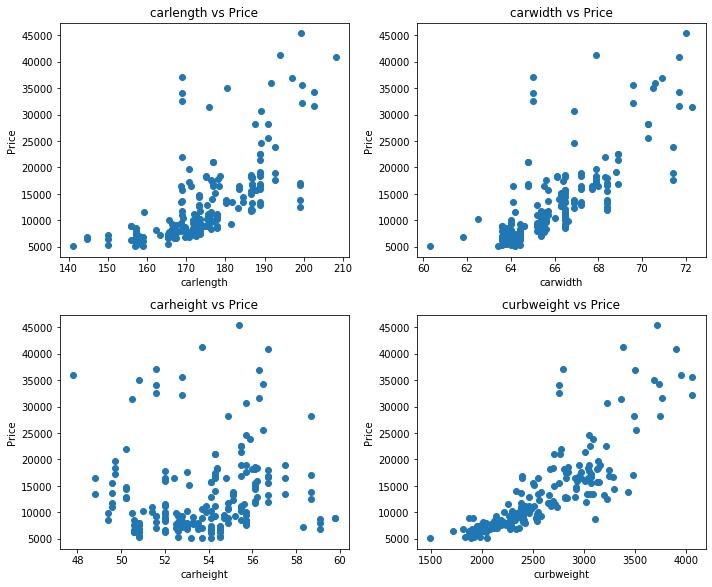

In [130]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()


#### 1.It seems that the carlength, carweight and carwidth has the postive corelation with price

#### 2.Carheight has no significant relation with price

In [131]:
np.corrcoef(df['carlength'], df['carwidth'])[0, 1]

0.8411182684818455

C:\Users\dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


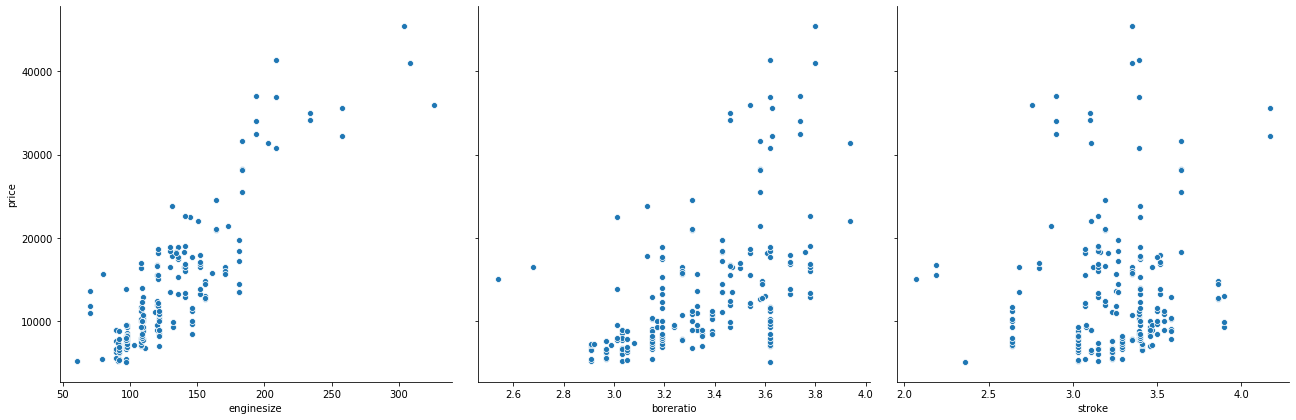

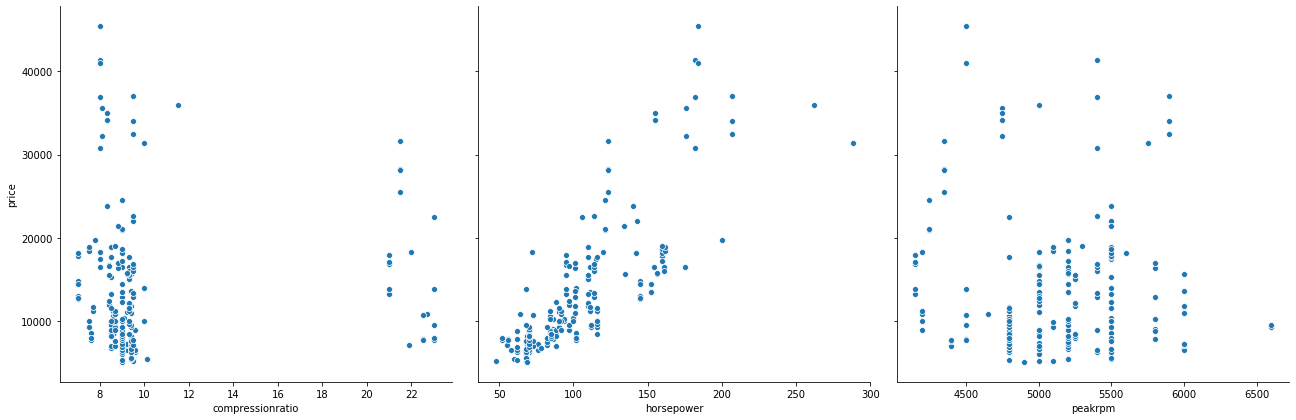

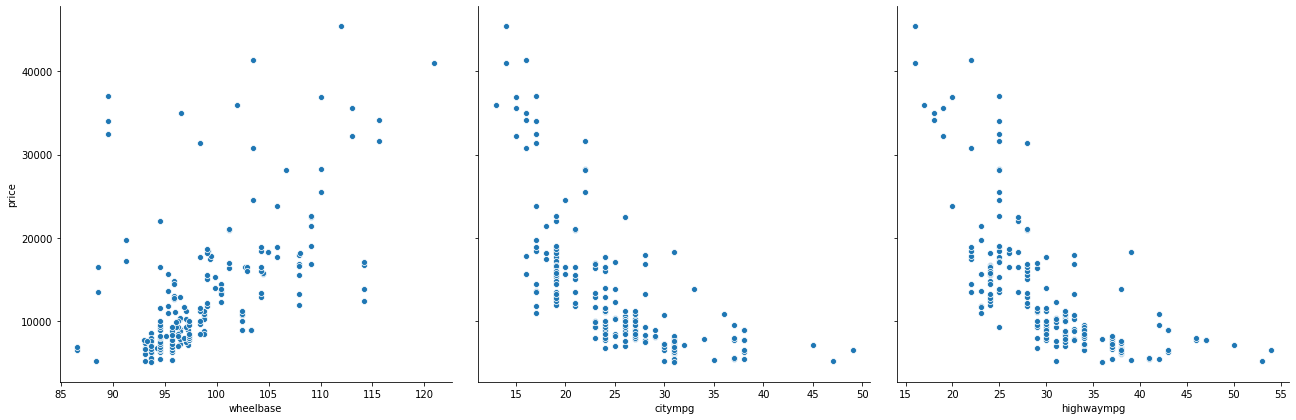

In [132]:
def pp(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars='price',size=6, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

#### <u>Enginesize</u>, <u>boreratio</u>, <u>horsepower</u>, <u>wheelbase</u> - seems to have a significant positive correlation with price

In [133]:
df['fueleconomy'] = (0.55 * df['citympg']) + (0.45 * df['highwaympg'])

In [134]:
df.head()

,symboling,fueltype,Car_Name,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80


In [135]:
df['price'] = df['price'].astype('int')
temp = df.copy()
table = temp.groupby(['Car_Name'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='Car_Name')
bins = [0,10000,20000,40000]
df_bin=['Budget','Medium','Highend']
df['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=df_bin)
df.head()

,symboling,fueltype,Car_Name,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


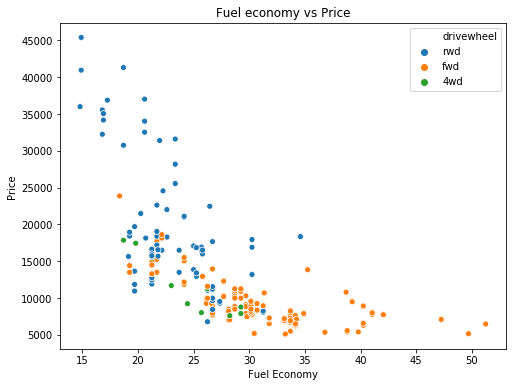

In [136]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=df['fueleconomy'],y=df['price'],hue=df['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()


#### fueleconomy has an obvious negative correlation with price and is significance

In [137]:
df.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,-0.003257
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,-0.508136
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682921,-0.691472
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325,-0.663419
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119337,-0.076356
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305,-0.781535
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145,-0.669464
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553174,-0.589898
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443,-0.043281
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984,0.299310


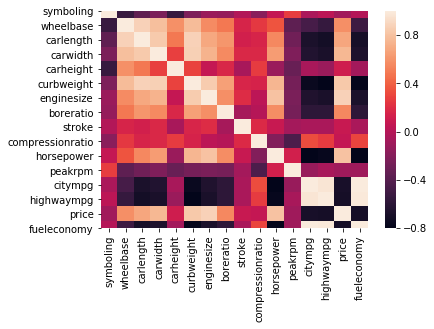

In [138]:
sns.heatmap(df.corr())

In [139]:
### Getting the Required Columns

df1 = df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
df1.head()


,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


In [140]:
### Converting Categorical variable into Numerical

fueltype = pd.get_dummies(df1['fueltype'],drop_first = True)


In [141]:
df1 = pd.concat([df1,fueltype], axis = 1)

In [142]:
df1.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange,gas
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium,1
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium,1
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium,1
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium,1
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium,1


In [143]:
aspiration = pd.get_dummies(df1['aspiration'],drop_first = True)

In [144]:
df1 = pd.concat([df1,aspiration], axis = 1)

In [145]:
carbody = pd.get_dummies(df1['carbody'],drop_first = True)

In [146]:
df1 = pd.concat([df1,carbody], axis = 1)

In [147]:
wheel = pd.get_dummies(df1['drivewheel'],drop_first = True)

In [148]:
df1 = pd.concat([df1,wheel], axis = 1)

In [149]:
enginetype= pd.get_dummies(df1['enginetype'],drop_first = True)

In [150]:
df1 = pd.concat([df1,enginetype], axis = 1)

In [151]:
cy = pd.get_dummies(df1['cylindernumber'],drop_first = True)

In [152]:
df1 = pd.concat([df1,cy], axis = 1)

In [153]:
carrange = pd.get_dummies(df1['carsrange'],drop_first = True)

In [154]:
df1 = pd.concat([df1,carrange], axis = 1)

In [155]:
### Droping the categorical variable into the data

df1.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'carsrange'], axis = 1, inplace = True)

In [156]:
df1.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


In [157]:
X = df1.loc[:,['enginesize', 'horsepower',  'carlength']]
y = df1.price

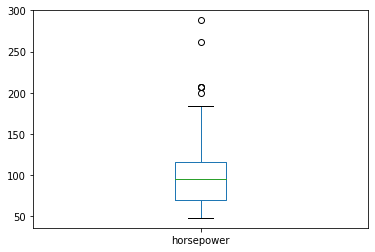

In [158]:
df1.horsepower.plot(kind = 'box')

In [159]:
### Dropping the highest outlier in the horsepower

df1[df1.horsepower==df1.horsepower.max()]


,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
129,31400,98.4,3366,203,3.94,288,21.95,175.7,72.3,1,...,0,0,0,0,0,0,0,0,0,1


In [160]:
df1 = df.drop(index=129)

### Trainaing and Testing the Data

In [161]:
### training and testing model selection
from sklearn.model_selection import train_test_split

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state=100)

In [163]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (164, 3)
X_test shape (41, 3)
y_train shape (164,)
y_test shape (41,)


In [164]:
### Importing machine learning algorithm
from sklearn.linear_model import LinearRegression

In [165]:
model = LinearRegression()

In [166]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [167]:
y_predict = model.predict(X_test)

In [168]:
### Model evaluation 
from sklearn.metrics import r2_score, accuracy_score
from sklearn import metrics

In [169]:
r2_score(y_test,y_predict)

0.8286075952062073

In [170]:
y_test

160     7738
186     8495
59      8845
165     9298
140     7603
64     11245
198    18420
75     16503
172    17669
104    17199
200    16845
136    18150
111    15580
41     12945
73     40960
31      6855
156     6938
133    12170
65     18280
83     14869
195    13415
197    16515
126    32528
118     5572
167     8449
101    13499
124    12764
69     28176
11     16925
46     11048
77      6189
15     30760
110    13860
201    19045
115    16630
174    10698
134    15040
169     9989
92      6849
173     8948
74     45400
Name: price, dtype: int32

In [171]:
predictions = model.predict(X_test)

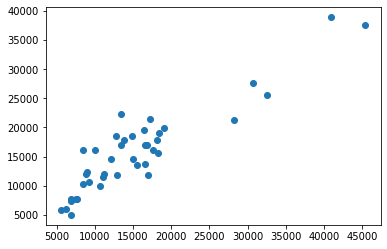

In [172]:
plt.scatter(y_test,predictions)

In [173]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
y_predict = model_lr.predict(X_test)
r2_score(y_test,y_predict)

0.8286075952062073

In [174]:
y_test

160     7738
186     8495
59      8845
165     9298
140     7603
64     11245
198    18420
75     16503
172    17669
104    17199
200    16845
136    18150
111    15580
41     12945
73     40960
31      6855
156     6938
133    12170
65     18280
83     14869
195    13415
197    16515
126    32528
118     5572
167     8449
101    13499
124    12764
69     28176
11     16925
46     11048
77      6189
15     30760
110    13860
201    19045
115    16630
174    10698
134    15040
169     9989
92      6849
173     8948
74     45400
Name: price, dtype: int32

In [175]:
y_predict

array([ 7650.99000322, 10237.21915908, 12055.84196594, 10630.55181238,
        7716.82177995, 12055.84196594, 19069.03721331, 19617.41530807,
       16111.72467395, 21490.48932141, 16978.77859598, 17869.51469182,
       13606.39239428, 11783.71789722, 38876.71878314,  4994.86111746,
        7650.99000322, 14651.21898162, 15686.01602567, 18541.55375147,
       16978.77859598, 16978.77859598, 25489.5393603 ,  5759.76541252,
       16111.72467395, 22241.44848216, 18541.55375147, 21223.99625027,
       11763.13885497, 11571.08059115,  5941.45727879, 27556.20033265,
       17917.44543522, 19939.61064937, 13735.12422269, 10004.48841722,
       14651.21898162, 16111.72467395,  7380.6975673 , 12317.5919847 ,
       37489.11781225])

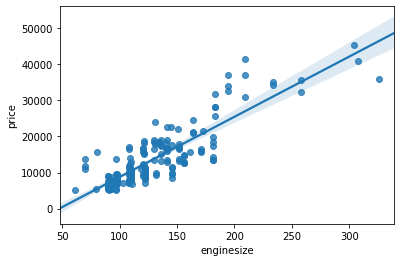

In [176]:
sns.regplot(x = "enginesize", y = "price", data = df1)

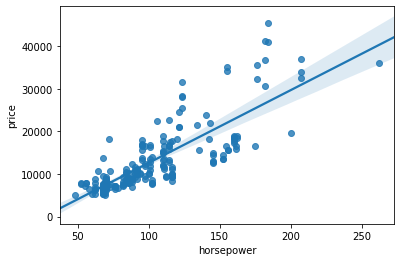

In [177]:
sns.regplot(x = "horsepower", y = "price", data = df1)

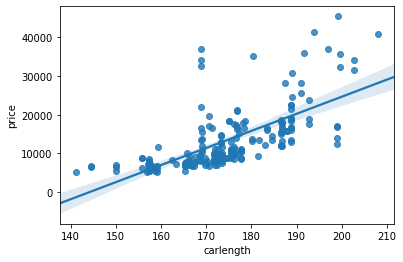

In [178]:
sns.regplot(x = "carlength", y = "price", data = df1)

## Final Conclusion of price along with the Manufacturing Insights.

### 1. There is a significant difference in Mean and Median. By the analysis, about 85% of the cars price is about Rs.18500. As per our predicition which is 82%, We can conclude that the price of the new the car should lies between 10000 to 18500 approx.

### 2. For the Manufacturing of a new car, fuel like gas should be preferred. 

### 3. Car type like Sedan is mostly preferred.

### 4. Symbolling of a car must be in range of 0 to 1 

### 5. Car body should be Hatchback type as it is having low variance with the price

### 6. The length of the car should lies between 160 to 180

### 7. For introducing a new car, the horse power must be in range of 60 to 110 to compite with  the price.

### 8. The size of the engine should be in range of 55 to 120

### Thus this are some parameters which helps for the manufacturing a new car along with the siginificant price range.

